# Detecting Fraudulent Credit Card Activity
## Using Imbalanced Data
---
Raw data pulled from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud/data)

Original data credited to: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

---
##### This notebook is broken up three primary sections:
* Exploratory Data Analysis
* Model Fitting & Tuning
* Conclusions

# Exploratory Data Analysis

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Load and describe raw data
cc_fraud = pd.read_csv('./data/creditcard.csv')
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Principal Component Analysis (PCA)
Unforunately, this data has already been transformed using PCA.  The only original features we can access are the purchase amount ('Amount') and time.  According to the original contributor's this is due to confidentiality agreements with the commercial vendor.  As a result, the above statistical descriptions of the input features are fairly meaningless, in that we have no intuitive method for interpreting these values.

In any case, the PCA-transformed will prove to be sufficient for our modeling purposes.  In fact, PCA can be a fairly common unsupervised method for data pre-processing.  The biggest downside is that our model results will give us very little information to conceptually infer what factor's contribute to a purchase's likelihood of being fraudulent.

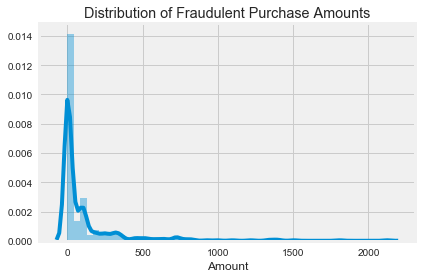

In [3]:
# Distribution of fraudulent purchase amounts
sns.distplot(cc_fraud[(cc_fraud['Class'] == 1)].Amount);
plt.title('Distribution of Fraudulent Purchase Amounts');

In [4]:
#  Counts/% of Target Classes
print 'Target Class Counts: '
print cc_fraud['Class'].value_counts()
print '###################################'
print 'Target Class %: '
print (cc_fraud['Class'].value_counts()/len(cc_fraud))*100

Target Class Counts: 
0    284315
1       492
Name: Class, dtype: int64
###################################
Target Class %: 
0    99.827251
1     0.172749
Name: Class, dtype: float64


**As you can see, there is a dramatic class imbalance in our target labels.  Unsurprisingly, far more credit card purchases are legitimate than fraudulent!  We will discuss how to deal with this in the Model Fitting section of this notebook.**

While the descriptive statistics of input features above are not particularly meaningful (in terms of interpretation), we can examine the impact that the various principal components may have on our ability to predict our target variable.

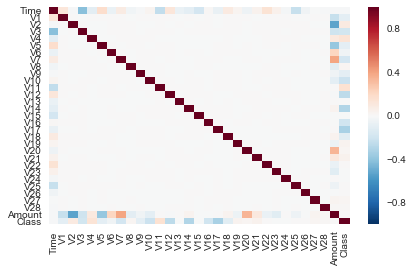

In [5]:
# Plot a heat map of correlation matrix for original data
sns.heatmap(cc_fraud.corr());

Notice that:
* There are several variables that are fairly highly correlated with the class label
* None of the input features are highly correlated with one another

This second point is a product of the fact that the original data has already been PCA transformed.  By performing PCA on the underlying raw data, the provider has actually transformed the data into an orthnomoral vector space, thereby mnimizing the correlation between transformed input features.

In [6]:
# Identify highly-correlated (both positively and negatively) variables with target variable
corr_ranks = cc_fraud.corr()['Class']
ranked = np.abs(corr_ranks).sort_values(ascending=False)
print ranked

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


We will iterate through these features ranked by correlation moving forward to determine the optimal input feature set.  By examining these ranked correlation values, however, we anticipate using the first 8-12 input Principal Components to classify fraudulent activities.

# Model Fitting and Parameter Tuning
---

In this section, we will consider data pre-processing in order to fit a classification model to the transaction data.  We will also explore several types of predictive models, including Random Forest Classifiers and Logistic Regression.

In [7]:
# Create a balanced dataset on which to train/test using an undersampling approach to the legitimate purchase class
fraud = cc_fraud[(cc_fraud['Class']==1)]
not_fraud = cc_fraud[(cc_fraud['Class']==0)]

fraud_sample = fraud.sample(250)
not_fraud_sample = not_fraud.sample(250)

balanced = fraud_sample.append(not_fraud_sample)
balanced['Class'].value_counts()

1    250
0    250
Name: Class, dtype: int64

In [8]:
# Function to calculate accuracy score, true positive rate, false positive rate, and AUROC for any model/dataset
def advanced_metrics(model,x,y):
    cfm = confusion_matrix(y,model.predict(x))
    print cfm
    score = model.score(x,y)
    tpr = cfm[1][1]/float(cfm[1][0]+cfm[1][1])
    fpr = cfm[0][1]/float(cfm[0][0]+cfm[0][1])
    auroc = roc_auc_score(y, model.predict(x))
    print 'True Positive Rate: ', tpr
    print 'False Positive Rate: ', fpr
    print 'Accuracy Score: ', score
    print 'AUROC: ', auroc
    return score,tpr,fpr,auroc

# Logistic Regression
---

#### Examine the performance of a logistic regression model in trying to identify fraudulent credit card purchases.
We will use a preliminary Logistic Regression classifier against various numbers of input features to determine what optimal feature set we will use in future models.

Max AUROC achieved with 9 input features


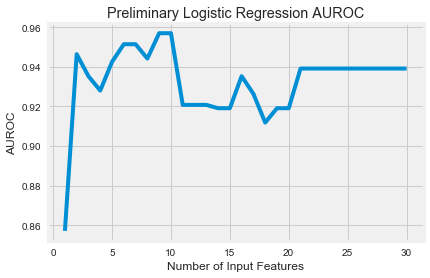

In [38]:
logit_feat = LogisticRegression()
feat_aurocs = []
num_feats = []
X_feats_train, X_feats_test, y_feats_train, y_feats_test = train_test_split(balanced.drop('Class',axis=1),balanced['Class'],random_state=124)
for f in range(1,len(list(ranked.index))):
    feats = list(ranked.index[1:f+1])
    num_feats.append(len(feats))
    logit_feat.fit(X_feats_train[feats],y_feats_train)
    feat_aurocs.append(roc_auc_score(y_feats_test,logit_feat.predict(X_feats_test[feats])))

opt_num_feats = feat_aurocs.index(max(feat_aurocs))
print 'Max AUROC achieved with', opt_num_feats+1, 'input features'
plt.plot(num_feats,feat_aurocs);
plt.xlabel('Number of Input Features');
plt.ylabel('AUROC');
plt.title('Preliminary Logistic Regression AUROC');

In [39]:
top_features = list(ranked.index[1:opt_num_feats+2])
print list(top_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4']


The above Principal Components are the input features we will use.  And just for fun, we are also going to include the Purchase Amount.

In [40]:
top_features.append('Amount')

In [41]:
# Split data into input and target variables
X_all = cc_fraud[top_features]
y_all = cc_fraud['Class']

# Perform a train/test split on the entire data set for demonstration purposes
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all,y_all,random_state=124)

In [42]:
# Split balanced sample set into input and target variables
# Split into train/test sets
X = balanced[top_features]
y = balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=124)


### Unbalanced Classes
First, we will consider a classifier trained on the training split of the entire dataset, to include the unbalanced classes.

In [43]:
# Initialize model object
logit_skewed = LogisticRegression()
# Fit to unbalanced training set
logit_skewed.fit(X_all_train,y_all_train)
# Print performance metrics
skew_test_score, skew_test_tpr, skew_test_fpr, skew_test_auroc = advanced_metrics(logit_skewed,X_all_test,y_all_test)

[[71074     8]
 [   55    65]]
True Positive Rate:  0.541666666667
False Positive Rate:  0.000112546073549
Accuracy Score:  0.999115193393
AUROC:  0.770777060297


**Notice how the accuracy score is very high, but TPR and AUROC are both fairly low.  This is due to the significantly unbalanced classes in the entire dataset.  In fact, the model would achieve a >98% accuracy by simply always classifying purchases as legitimate.**

This highlights the need to somehow deal with the class imbalance- our primary strategy will be to undersample the legitimate (0) class to create an even distribution of outcomes in the training and test data.  Moving forward, we will use the train/test split from the sampled balanced dataset (X_train, X_test, y_train, y_test).

In [44]:
# Initialize and fit against balanced training set
logit = LogisticRegression()

logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# Print accuracy, tpr, fpr, and AUROC against balanced test set
logit_test_score, logit_test_tpr, logit_test_fpr, logit_test_auroc = advanced_metrics(logit,X_test,y_test)

[[68  1]
 [ 3 53]]
True Positive Rate:  0.946428571429
False Positive Rate:  0.0144927536232
Accuracy Score:  0.968
AUROC:  0.965967908903


## Performance Against Entire Dataset
Now we turn the Logistic Regression model towards the entire original dataset (not just the class-balanced subset) and consider the logistic regression's performance.  We will consider the True Positive Rate and False Positive Rate of the classifier, along with its accuracy and AUROC.

In [46]:
# Evaluate performance metrics of model trained on balanced training set against the entire original dataset
logit_all_score, logit_all_tpr, logit_all_fpr, logit_all_auroc = advanced_metrics(logit,X_all,y_all)

[[272574  11741]
 [    40    452]]
True Positive Rate:  0.918699186992
False Positive Rate:  0.0412957459156
Accuracy Score:  0.958635145906
AUROC:  0.938701720538


### Logistic Regression Coefficients

In [47]:
coefficients = pd.DataFrame(zip(top_features,logit.coef_[0]),columns=['Input Feature','Coefficient'])
coefficients

,Input Feature,Coefficient
0,V17,0.396349
1,V14,-0.974082
2,V12,-0.552713
3,V10,-0.169399
4,V16,-0.113320
5,V3,-0.319093
6,V7,-0.273704
7,V11,0.354301
8,V4,0.573340
9,Amount,0.001892


As we can see from the AUROC, TPR, FPR, and accuracy scores above, our logistic regression actually performs fairly well.  It also has the benefit of providing coefficients that we can interpret against our principal components to understand how each of them contributes to the likelihood of a purchase being fraudulent.

# Random Forest Classifier

Max Depth:  1
[[69  0]
 [ 8 48]]
True Positive Rate:  0.857142857143
False Positive Rate:  0.0
Accuracy Score:  0.936
AUROC:  0.928571428571
----------------------------------------------------
Max Depth:  2
[[68  1]
 [ 7 49]]
True Positive Rate:  0.875
False Positive Rate:  0.0144927536232
Accuracy Score:  0.936
AUROC:  0.930253623188
----------------------------------------------------
Max Depth:  3
[[68  1]
 [ 5 51]]
True Positive Rate:  0.910714285714
False Positive Rate:  0.0144927536232
Accuracy Score:  0.952
AUROC:  0.948110766046
----------------------------------------------------
Max Depth:  4
[[67  2]
 [ 4 52]]
True Positive Rate:  0.928571428571
False Positive Rate:  0.0289855072464
Accuracy Score:  0.952
AUROC:  0.949792960663
----------------------------------------------------
Max Depth:  5
[[68  1]
 [ 4 52]]
True Positive Rate:  0.928571428571
False Positive Rate:  0.0144927536232
Accuracy Score:  0.96
AUROC:  0.957039337474
---------------------------------------------

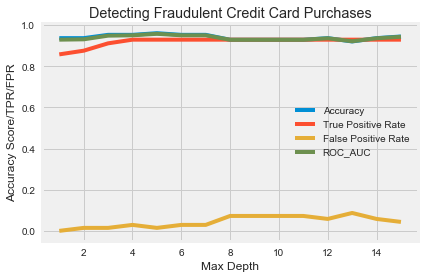

In [49]:
# Iterate through a range of max_depth values for the Random Forest Classifier
# Output the accuracy, tpr, fpr, and auroc scores against the balanced test set

max_depth_range = range(1,16)
scores = []
fprs = []
tprs = []
aurocs = []

for depth in max_depth_range:
    rf_class = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth)
    rf_class.fit(X_train,y_train)
    y_rf_pred = rf_class.predict(X_test)
    score = rf_class.score(X_test,y_test)
    print 'Max Depth: ', depth
    score,tpr,fpr,auroc  = advanced_metrics(rf_class,X_test,y_test)
    print '----------------------------------------------------'
    tprs.append(tpr)
    fprs.append(fpr)
    scores.append(score)
    aurocs.append(auroc)

print 'Max AUROC achieved at max_depth =', max_depth_range[aurocs.index(max(aurocs))]
print 'Max TPR achieved at max_depth =', max_depth_range[tprs.index(max(tprs))]
print 'Min FPR achieved at max_depth =', max_depth_range[fprs.index(min(fprs))]

depth_to_use = max_depth_range[aurocs.index(max(aurocs))]

plt.plot(max_depth_range,scores, label='Accuracy');
plt.plot(max_depth_range,tprs, label='True Positive Rate');
plt.plot(max_depth_range,fprs, label='False Positive Rate');
plt.plot(max_depth_range,aurocs, label='ROC_AUC');
plt.xlabel('Max Depth');
plt.title('Detecting Fraudulent Credit Card Purchases')
plt.ylabel('Accuracy Score/TPR/FPR');
plt.legend();

In [50]:
rf = RandomForestClassifier(n_estimators=100, max_depth=depth_to_use)
# Train against
rf.fit(X_train,y_train)
print 'Calculating performance metrics on balanced test dataset...'
test_score, test_tpr,test_fpr,test_auroc = advanced_metrics(rf,X_test,y_test)
print '----------------------------------------------------'
print 'Calculating performance metrics on entire balanced dataset...'
bal_score,bal_tpr,bal_fpr,bal_auroc = advanced_metrics(rf,X,y)
print '----------------------------------------------------'
print 'Calculating performance metrics on entire original dataset...'
all_score,all_trp,all_fpr,all_auroc = advanced_metrics(rf,X_all,y_all)


Calculating performance metrics on balanced test dataset...
[[67  2]
 [ 4 52]]
True Positive Rate:  0.928571428571
False Positive Rate:  0.0289855072464
Accuracy Score:  0.952
AUROC:  0.949792960663
----------------------------------------------------
Calculating performance metrics on entire balanced dataset...
[[248   2]
 [ 13 237]]
True Positive Rate:  0.948
False Positive Rate:  0.008
Accuracy Score:  0.97
AUROC:  0.97
----------------------------------------------------
Calculating performance metrics on entire original dataset...
[[270517  13798]
 [    38    454]]
True Positive Rate:  0.922764227642
False Positive Rate:  0.0485306790004
Accuracy Score:  0.951419733363
AUROC:  0.937116774321


***Notice that for both the balanced training set, as well as the comprehensive entire dataset, this Random Forest classifier performs better than its Logistic Regression counterpart by all relevant measures (>TPR, <=FPR, >AUROC, >Accuracy).***

In [51]:
# Display feature importances.
pd.DataFrame({'feature':top_features, 'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
1,V14,0.305542
3,V10,0.228370
7,V11,0.125071
2,V12,0.081990
0,V17,0.078183
5,V3,0.062534
6,V7,0.039034
8,V4,0.030130
4,V16,0.029716
9,Amount,0.019429


***Unfortunately, because our data is already PCA transformed,*** the feature importance tells us very little about the influence specific original features have on the likelihood of a purchase being fraudulent or not.  It is interesting to note, however, that the dollar amount is of relatively little importance.  This may go against the intuition that sudden, high $ amount purchases are a good indication of fraudulent activity.  Alternatively, credit card thieves may have realized that primitive fraudulent activity detection mechanisms were prone to missing lots of small purchases, as opposed to a single large purchase.

In [52]:
# Analyze $ Amount distributions across our various prediction classes.
rf_data = cc_fraud.copy()
rf_data['rf_pred'] = rf.predict(X_all)

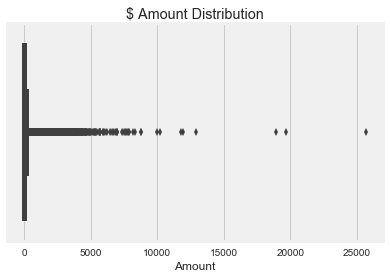

In [53]:
sns.boxplot(rf_data.Amount);
plt.title('$ Amount Distribution');

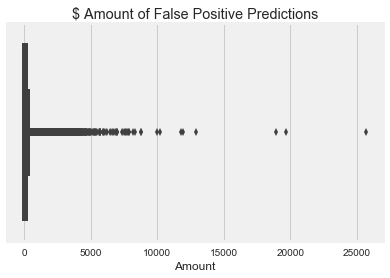

In [54]:
fps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 0)]
sns.boxplot(fps.Amount);
plt.title('$ Amount of False Positive Predictions');

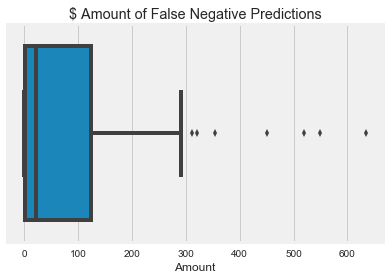

In [55]:
fns = rf_data[(rf_data.rf_pred == 0) & (rf_data['Class'] == 1)]
sns.boxplot(fns.Amount);
plt.title('$ Amount of False Negative Predictions');

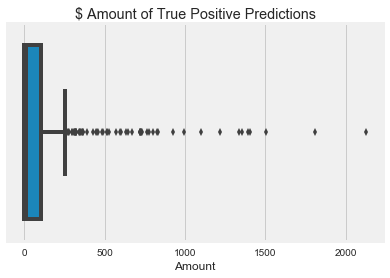

In [56]:
tps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 1)]
sns.boxplot(tps.Amount);
plt.title('$ Amount of True Positive Predictions');

**Notice from the above graphs**, that the dollar amount of fraudulent activity that our model missed (False Negatives) is typically small relative to the distribution of dollar amounts.

## Does target class imbalance cause the same problems for a Random Forest classifier that we saw with Logistic Regression?



In [57]:
# Fit a random forest classifier to a training split of the ORIGINAL UNBALANCED DATASET
# Analyze performance of this classifier compared to the similarly trained logistic regression
rf_unbalanced = RandomForestClassifier(n_estimators=100,max_depth=3)
rf_unbalanced.fit(X_all_train,y_all_train)
rf_ub_score,rf_ub_tpr,rf_ub_fpr,rf_ub_auroc = advanced_metrics(rf_unbalanced,X_all_test,y_all_test)

[[71070    12]
 [   34    86]]
True Positive Rate:  0.716666666667
False Positive Rate:  0.000168819110323
Accuracy Score:  0.999353950732
AUROC:  0.858248923778


***Yes and no.***  Notice that the accuracy score, similarly to before, is still very high.  This is to be expected even with a very poor classifier for our data, due to the unbalanced nature of the target values.  However, also notice that the AUROC, TPR, and FPR metrics for the unbalanced test set are significantly better for the Random Forest classifier trained on the unbalanced training set compared to the Logistic Regression model trained on the same data.

The reason for this is because the Random Forest classifier aims to maximize the node purity (according to the Gini index) in each of its base estimators, while the Logistic Regression classifier aims to maximize accuracy.  By seeking to maximize node purity, the Random Forest classifier is able to actually *learn* something about the underlying data, despite the unbalanced target classes.  Due to the way that each of the base estimators seek to partition data in a way that maximizes node purity, and the classifer aggregates these individual partitions to "vote" on specific data points, the partitions are formed in such a way that is not nearly as effected by the class imbalance compared to a Logistic Regression model.

You will also notice that, while the TPR and AUROC for this model are quite a bit lower compared to the same metrics for the  Random Forest classifier trained on the balanced training set, the FPR is in fact *better* for this model.

***Why is this the case?***

The random forest works by each base estimator "voting" on the classification of a test data point, based on how that data point evaluates in each base estimator's respective decision tree.  The randomization involved in training these base estimators means that the class imbalance *still* exercises some influence over each base estimator's "vote".  In particular, if each base estimator is formed by simply randomly partitioning the training set, then a single terminal node (leaf) is far more likely to vote to classify a new data point as the overall majority target class than the under-represented class.  So, while the Random Forest improves upon the Logistic Regression in extracting meaningful feature values on which to base classifications, it still falls victim to the influence of the class imbalance.

For this reason, we see that the Random Forest classifier trained on a balanced training/test split still performs better than its counterpart trained on a training split from the original unbalanced data.

# Conclusions

Ultimately, we have seen two different methods of classification (Logistic Regression and Random Forests) perform very well in detecting fraudulent credit card activity.  Using undersampling to create balanced target classes, we were able to effectively identify fraudulent credit card purchases.  Ultimately, had this data not been PCA transformed, I would recommend using Logistic Regression for classification moving forward, mostly because it provides interpretable results through its coefficients while producing similarly effective results compared to the Random Forest classifier.  While the coefficients on the transformed data are not particularly meaningful, a similar model trained against the raw, un-transformed data would return far more meaningful insights. 